# Trabajo grupal
## Polinomios de Chebyshev y procesamiento de imágenes en Jupyter Notebooks
### Autores: 
* AVILÉS CAHILL, ADÁN 
* BAILAZ PASCUA, ENRIQUE
* CABRERA SÁNCHEZ, MONSERRAT
* DIZ-LOIS PALOMARES, FERNANDO

## Presentación del problema. 
Se procede a realizar ajustes e interpolaciones en Python utilizando *NumPy* y los módulos *interpolate* y optimize de *SciPy*. Estas funciones son
* La función seno, f(x) = $\sin$(x), con la cual trabajaremos entre (-$\pi$, $\pi$). 
  
* La función de Runge, conocida por su alta oscilación en las aproximaciones polinomiales, y con ecuación r(x) = $\dfrac{1}{1+25x^2}$. Tomaremos el abierto (-1,1) para este caso.
  
* La función Gaussiana f(x) = $\mathcal{a}\exp(-\dfrac{(x-\mathcal{b})^2}{2\mathcal{c}^2})$, con parámetros $\mathcal{a}=1$, $\mathcal{b}=0$ y $\mathcal{c}=\sqrt{\dfrac{1}{40}}$, dando lugar a g(x) = $e^{(-20x^2)}$, que estudiaremos también entre (-1, 1).
#### Procedimiento
Hemos decidido dividir el trabajo en tres archivos. El notebook con los resultados, un archivo .py con las contantes (los nodos) y otro archivo .py con las funciones. De esta manera evitamos sobrecargar el notebook final. 

In [ ]:
# Importo mis propias funciones forzando a que se renueven en cada carga 
# ==============================================================================
import constantes as const
import funciones_auxiliares as F
# Con autoreload forzamos que con cada cambio en los .py, se cargue de forma automática. 
%load_ext autoreload
%autoreload 2
# Importamos los paquetes a utilizar
# ==============================================================================
import numpy as np
import scipy as sp
from math import pi
import matplotlib.pyplot as plt
import matplotlib as mpl
# Para tener el estilo correcto
from matplotlib import style
style.use('default')

### Aproximaciones y representaciones de la función seno.


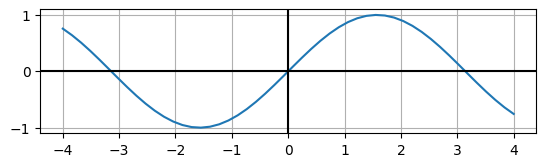

In [41]:
x = np.linspace(-4, 4)
y = F.sin_vec(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


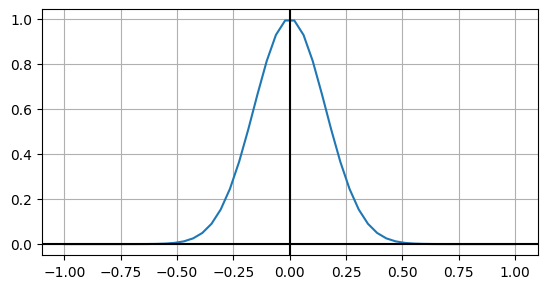

In [6]:
x = np.linspace(-1, 1)
y = F.exp_vec(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

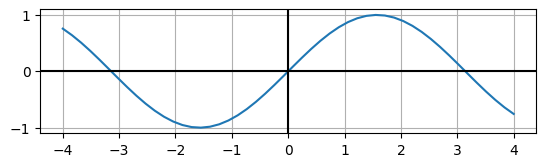

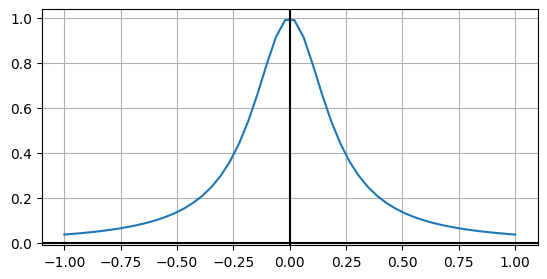

In [4]:
x = np.linspace(-1, 1)
y = F.runge_vec(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [37]:
from numpy.polynomial import chebyshev
coefsCheby11=[0,,1]

######## Seno
T11_sin = chebyshev.Chebyshev(coefsCheby11, [-1, 1])
nodosCheby11= T11_sin.roots()
nodosCheby11

array([-0.70710678,  0.70710678])

In [36]:
coefsCheby11

[0, 1]

In [40]:
const.nodos_cheby_gauss_11

array([-9.89821442e-01, -9.09631995e-01, -7.55749574e-01, -5.40640817e-01,
       -2.81732557e-01, -1.42186367e-17,  2.81732557e-01,  5.40640817e-01,
        7.55749574e-01,  9.09631995e-01,  9.89821442e-01])